In [1]:
!pip install numpy matplotlib pandas tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
with open("metrics.json", encoding="utf-8") as f:
    data = json.load(f)

In [4]:
# pd.set_option('display.max_rows', 500)

df = pd.DataFrame(data)
df.sort_values("duration", ascending=True)

,duration,value,block_size,grid_size,size,runtime,device
45,0.016976,0.333296,1024.0,2048.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
11,0.019052,0.333296,128.0,1024.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
4,0.019388,0.333296,64.0,16384.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
13,0.020226,0.333296,128.0,4096.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
38,0.020298,0.333295,512.0,32768.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
1,0.020832,0.333296,64.0,2048.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
44,0.020869,0.333296,1024.0,1024.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
9,0.021221,0.333303,64.0,524288.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
46,0.021366,0.333296,1024.0,4096.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics
47,0.022106,0.333295,1024.0,8192.0,100000000,OpenCL Reduction,Intel(R) Arc(TM) Graphics


In [5]:
runtimes = df["runtime"].unique()
runtimes

array(['OpenCL Reduction', 'C++', 'OpenBLAS', 'clBLASt'], dtype=object)

In [6]:
x = df[df['runtime'] != 'OpenCL Reduction']
x = x[x['runtime'] != 'CUDA Reduction']
x.sort_values("duration", ascending=True)

,duration,value,block_size,grid_size,size,runtime,device
57,0.030633,0.333295,NaN,NaN,100000000,clBLASt,Intel(R) Arc(TM) Graphics
56,0.036441,0.332568,NaN,NaN,100000000,OpenBLAS,CPU
55,0.056485,0.245709,NaN,NaN,100000000,C++,CPU


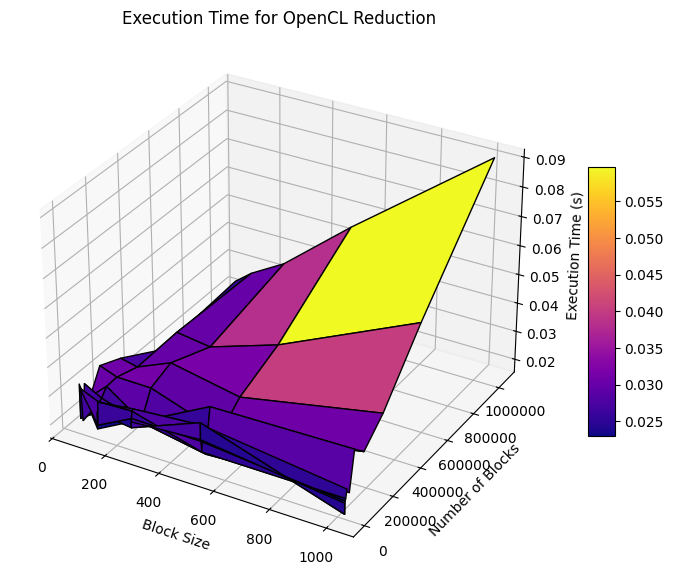

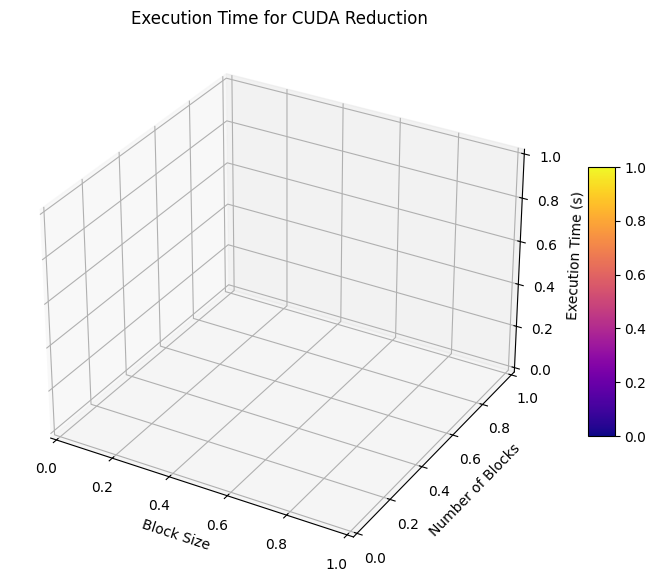

In [7]:


for target_runtime in ['OpenCL Reduction', 'CUDA Reduction']:
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['grid_size'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['grid_size'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
